Part 1:

A.
Covariance measures how two variables fluctuate together. It indicates whether the variables tend to increase or decrease together. Correlation: standardizes that change and scales it between -1 and 1, to give us an indication of the the strength and direction of their relationship. Looking at the equations we can see that the numerator of corr is equal to covariance: cov = np.sum((X - mean_X) * (Y - mean_Y))/ n/n-1, corr = (X - mean_X) * (Y - mean_Y) / std_X * std_Y


B.
Load and Explore Iris data set

In [14]:
import pandas as pd
import seaborn as sns

#load and overview dataset

df = sns.load_dataset("iris")

print(df.info())
print("\nFirst 10 rows:")
print(df.head(10))

num_rows, num_cols = df.shape
print(f"\nNumber of rows: {num_rows}, Number of columns: {num_cols}")

missing_values = df.isnull().sum()
print(f"\nTotal missing values in dataset: {missing_values.sum()}")

total_duplicates = df.duplicated().sum()
print(f"\nTotal duplicate rows: {total_duplicates}")

print("\nDescriptive Statistics:")
print(df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

First 10 rows:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7         

B.
Visualize relationships between the data:

-Plot of the distribution for all 4 features across all species
-The distribution of the 3 breeds features (Diagnally we can observe how each feature is distrbuted across the species and in each column we can see relationship between features this allows us to better understand the distbution(skewed,normal) and observe relationships between features.
-Correlation between the features. Which features are most strongly correlated


Graph 1:

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[["sepal_length", "sepal_width", "petal_length", "petal_width"]],color="skyblue") #boxplot of all the features distribution
plt.title("Iris Data distribution")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()


NameError: name 'plt' is not defined

Graph 2:

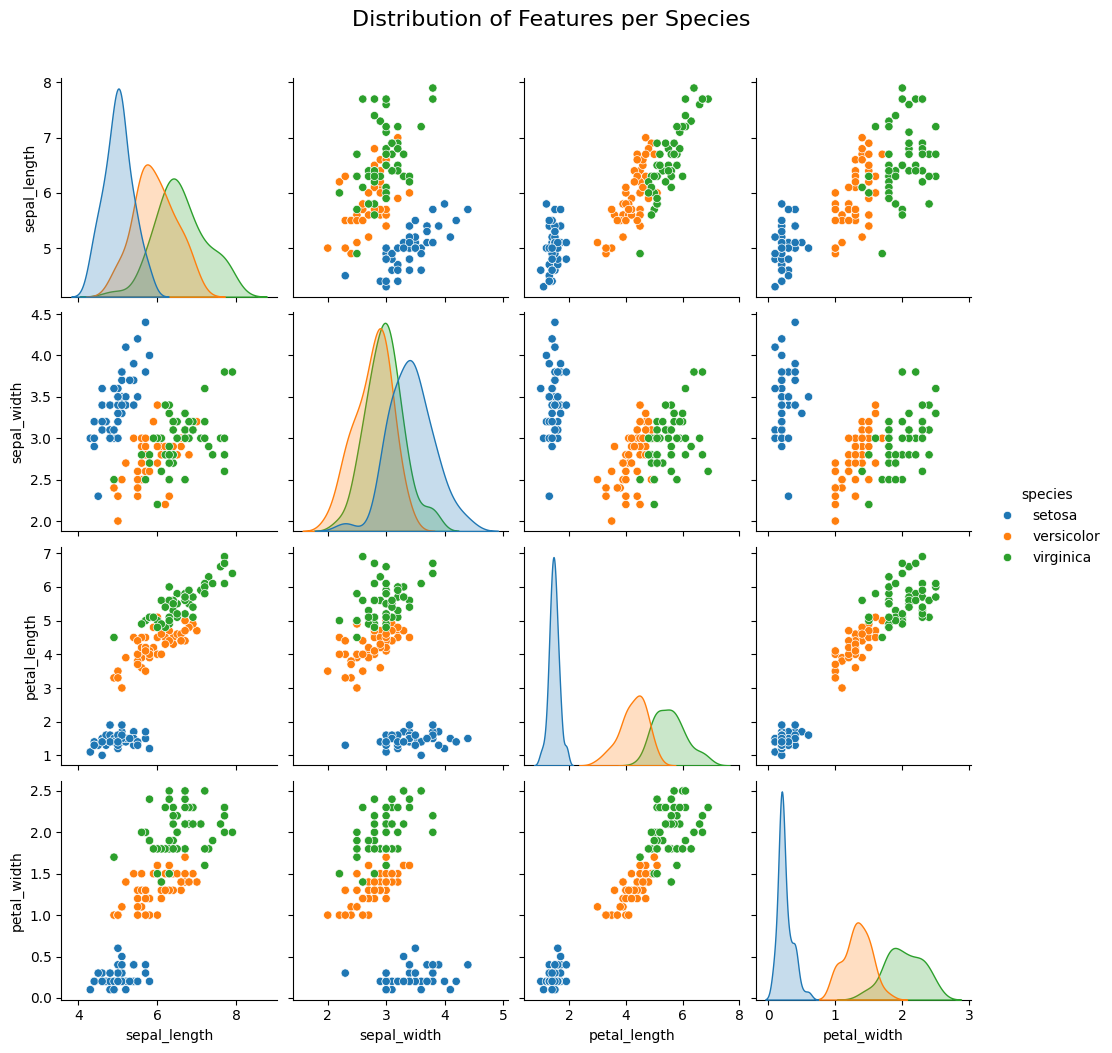

In [ ]:
sns.pairplot(df, hue="species", diag_kind="kde") #pairplot of the features distribution
plt.suptitle("Distribution of Features per Species", fontsize=16, ha="center", y=1.05)
plt.show()

Graph 3:

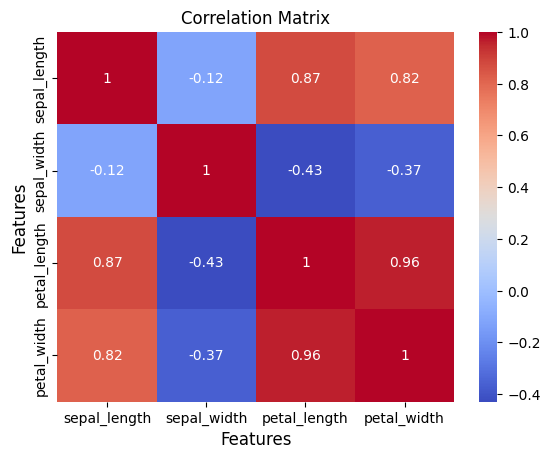

In [ ]:
# correlation matrix of all the features
correlation = df.iloc[:, :-1].corr()  #exclude last column
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

C. Implemention of functions: function for covariance and covariance matrix

In [13]:
import numpy as np

def calcCov(x, y):
    'A function to calculate the covariance between two variables '
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    cov = np.sum((x - mean_x) * (y - mean_y))/ (len(x) - 1)
    return cov

def covMat(data):
    'A function to calculate the covariance matrix returns an 4x4 covariance matrix'
    cov_mat = np.zeros((data.shape[1], data.shape[1])) # create empty cov matrix
    for i in range(data.shape[1]):   # index for first feature
        for j in range(data.shape[1]):  # index for second feature
            cov_mat[i,j] = calcCov(data[:,i], data[:,j])
    return cov_mat

D. Compare numpy's function with mine:

In [18]:
data = df.iloc[:, :-1].values
my_cov_matrix = covMat(data)
numpy_cov_matrix = np.cov(data, rowvar=False)

print("My Covariance Matrix:")
print(my_cov_matrix)
print("\nNumPy Covariance Matrix:")
print(numpy_cov_matrix)

# validation (the diff is minor and with a small tolerance for variation in float variables the result would be true -added for illustration)
are_equal = np.array_equal(my_cov_matrix, numpy_cov_matrix)
print(f"\nAre the matrices exactly equal? {are_equal}")
diff_matrix = my_cov_matrix - numpy_cov_matrix
print("\nDifference Matrix (My Cov - Numpy Cov):")
print(diff_matrix)
are_equal = np.allclose(my_cov_matrix, numpy_cov_matrix)
print(f"Are the matrices equal with tolerance? {are_equal}")

My Covariance Matrix:
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]

NumPy Covariance Matrix:
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]

Are the matrices exactly equal? False

Difference Matrix (My Cov - Numpy Cov):
[[ 3.33066907e-16  6.93889390e-18 -4.44089210e-16  1.11022302e-16]
 [ 6.93889390e-18  5.55111512e-17 -5.55111512e-17  2.77555756e-17]
 [-4.44089210e-16 -5.55111512e-17 -3.55271368e-15 -4.44089210e-16]
 [ 1.11022302e-16  2.77555756e-17 -4.44089210e-16  3.33066907e-16]]
Are the matrices equal with tolerance? True


E. A function to calculate correlation matrix

In [19]:
def corrMat(data):
    'a function to calculate the correlation matrix using the cov function'
    corr_mat = np.zeros((data.shape[1], data.shape[1]))# create empty corr matrix
    for i in range(data.shape[1]): #index for first feature
        for j in range(data.shape[1]):#index for second feature
           x = data[:, i]
           y = data[:, j]
           corr_mat[i, j] = calcCov(x, y) / (np.std(x, ddof=1) * np.std(y, ddof=1))# was not equal to numpy so corrected it to match numpy fuc( degrees of freedom=1)
    return corr_mat

F. validate correlation matrix implementation by comparing it with the
results of NumPy

In [20]:
data = df.iloc[:, :-1].values
my_corr_matrix = corrMat(data)
numpy_corr_matrix = np.corrcoef(data,rowvar=False)

print("My Correlation Matrix:")
print(my_corr_matrix)
print("\nNumPy Correlation Matrix:")
print(numpy_corr_matrix )


# Print the difference matrix
diff_matrix = my_corr_matrix - numpy_corr_matrix
print("\nDifference Matrix (My Corr - Numpy Corr):")
print(diff_matrix)

# validation and comparison for no tolerance vs tolernance
are_equal = np.array_equal(my_corr_matrix, numpy_corr_matrix)
print(f"\nAre the matrices exactly equal?  {are_equal}")
are_equal = np.allclose(my_corr_matrix, numpy_corr_matrix)
print(f"Are the matrices equal with tolerance? {are_equal}")

My Correlation Matrix:
[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]

NumPy Correlation Matrix:
[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]

Difference Matrix (My Corr - Numpy Corr):
[[ 0.00000000e+00  5.55111512e-17  1.11022302e-16 -2.22044605e-16]
 [ 5.55111512e-17  0.00000000e+00 -3.33066907e-16  1.66533454e-16]
 [ 1.11022302e-16 -2.77555756e-16  1.11022302e-16  1.11022302e-16]
 [-2.22044605e-16  2.22044605e-16  1.11022302e-16  3.33066907e-16]]

Are the matrices exactly equal?  False
Are the matrices equal with tolerance? True


G.  Visualizing for test results

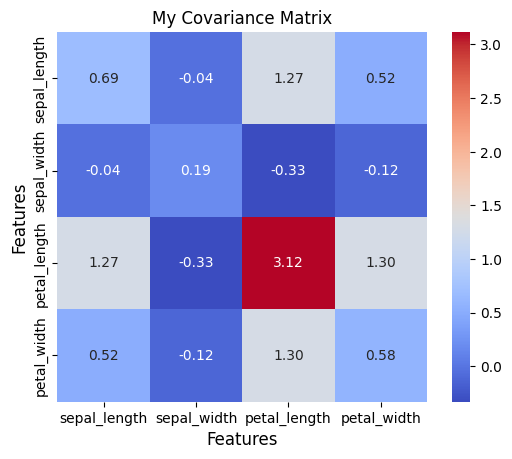

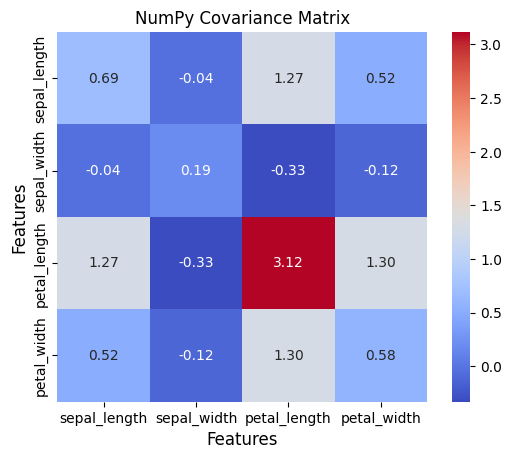

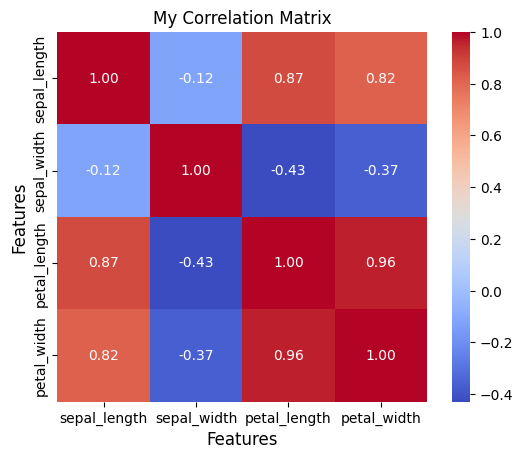

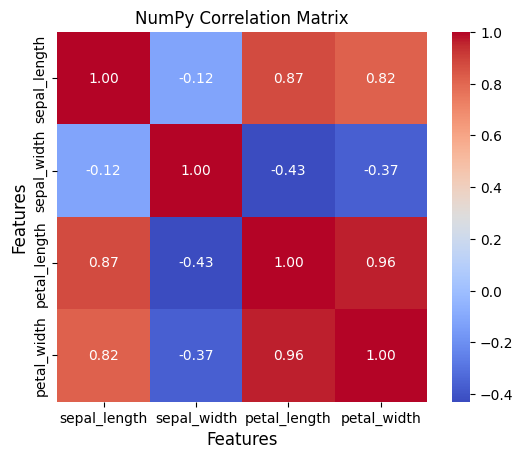

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# my Cov matrix
plt.figure()
sns.heatmap(my_cov_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True,
            xticklabels=df.columns[:-1], yticklabels=df.columns[:-1])  # Adjust column names to match data
plt.title("My Covariance Matrix")
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

# NumPy Cov matrix
plt.figure()
sns.heatmap(numpy_cov_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True,
            xticklabels=df.columns[:-1], yticklabels=df.columns[:-1])  # Adjust column names to match data
plt.title("NumPy Covariance Matrix")
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

# my corr matrix
plt.figure()
sns.heatmap(my_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True,
            xticklabels=df.columns[:-1], yticklabels=df.columns[:-1])  # Adjust column names to match data
plt.title("My Correlation Matrix")
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

# NumPy corr matrix
plt.figure()
sns.heatmap(numpy_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True,
            xticklabels=df.columns[:-1], yticklabels=df.columns[:-1])  # Adjust column names to match data
plt.title("NumPy Correlation Matrix")
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()


Part 2

Load and overview data

In [3]:
import pandas as pd

file_path = '/content/laptop_price - dataset.csv'
df = pd.read_csv(file_path)
print(df.head())

  Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook    13.3                            1440x900   
2      HP       250 G6   Notebook    15.6                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

  CPU_Company       CPU_Type  CPU_Frequency (GHz)  RAM (GB)  \
0       Intel        Core i5                  2.3         8   
1       Intel        Core i5                  1.8         8   
2       Intel  Core i5 7200U                  2.5         8   
3       Intel        Core i7                  2.7        16   
4       Intel        Core i5                  3.1         8   

                Memory GPU_Company                GPU_Type  OpSys  \
0            128GB SSD       Intel  Iris Plus Graphics 640  macOS

Plot price of all laptops

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# a scatterplot of all the laptops
fig = px.scatter(
    df,
    x="Product",
    y="Price (Euro)",
    size="Price (Euro)",
    color="Company",
    title="Price of all the laptops",
    labels={"Product": "Product", "Price (Euro)": "Price (Euro)"},width=1000,
  height=1000
)
fig.update_layout(xaxis=dict(title="Product"),
                  yaxis=dict(title="Price (Euro)"))
fig.show()

Avg Price of laptop for each company to determine company that has on average the most expensive laptops:

The company with the most expensive laptops is Razor. The avg price for each company can be viewed in the graph below


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Acer'),
  Text(1, 0, 'Apple'),
  Text(2, 0, 'Asus'),
  Text(3, 0, 'Chuwi'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Fujitsu'),
  Text(6, 0, 'Google'),
  Text(7, 0, 'HP'),
  Text(8, 0, 'Huawei'),
  Text(9, 0, 'LG'),
  Text(10, 0, 'Lenovo'),
  Text(11, 0, 'MSI'),
  Text(12, 0, 'Mediacom'),
  Text(13, 0, 'Microsoft'),
  Text(14, 0, 'Razer'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Toshiba'),
  Text(17, 0, 'Vero'),
  Text(18, 0, 'Xiaomi')])

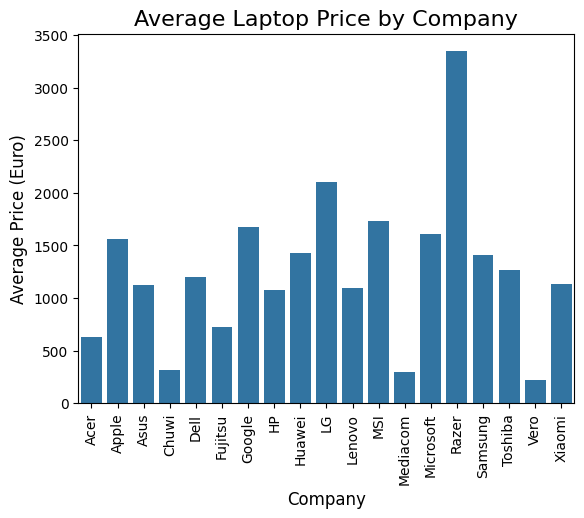

In [ ]:
avg_price_per_company = df.groupby('Company')['Price (Euro)'].mean().reset_index() # cal mean for different companies
plt.figure()
sns.barplot(x='Company', y='Price (Euro)', data=avg_price_per_company)
plt.title('Average Laptop Price by Company', fontsize=16)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Average Price (Euro)', fontsize=12)
plt.xticks(rotation=90)

Find the different types of Operating systems present in the data

In [ ]:
print("Operating Systems:")
print(df['OpSys'].unique()) # show all unqiue values in the column of Opsys

Operating Systems:
['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']


In [ ]:
df['OpSys'] = df['OpSys'].replace({
    'Mac OS X': 'macOS',
    'Windows 10 S': 'Windows 10'
})  # find the data that is similar and replace

print(df['OpSys'].unique()) # show new unique values

['macOS' 'No OS' 'Windows 10' 'Linux' 'Android' 'Chrome OS' 'Windows 7']


Plot for each of the operating system types the distribution of the prices

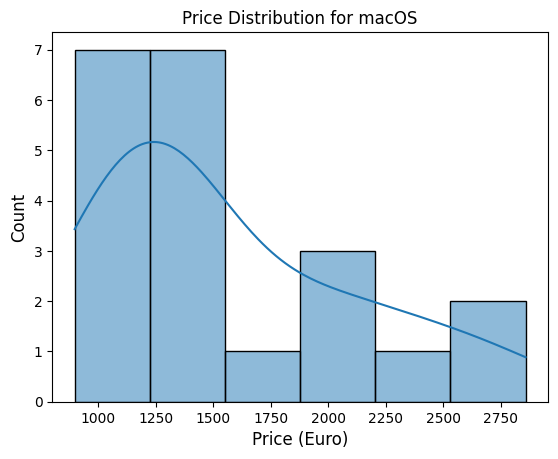

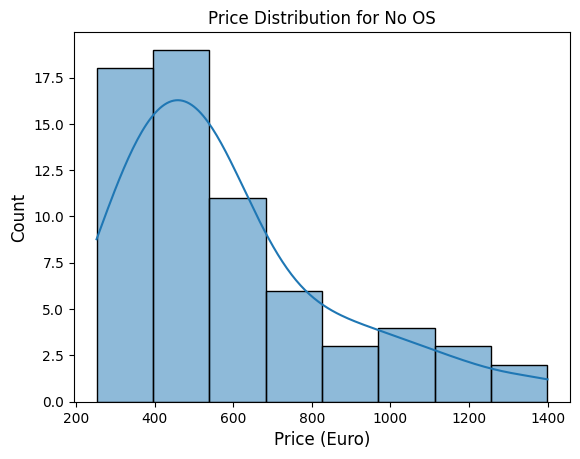

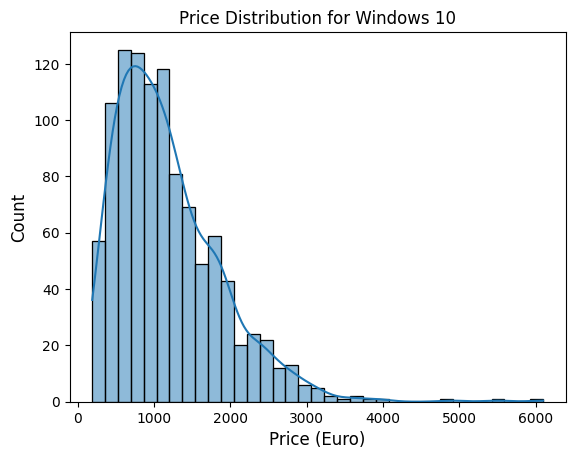

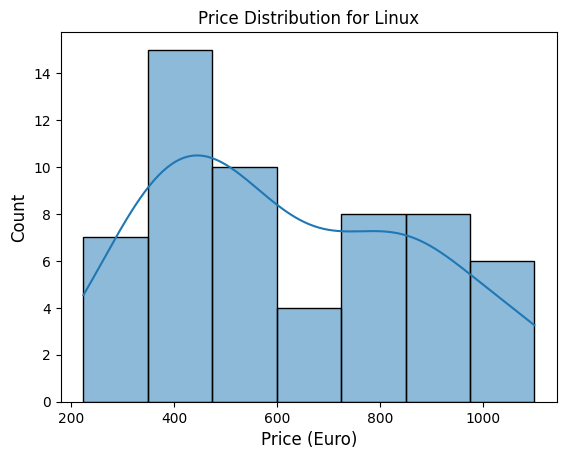

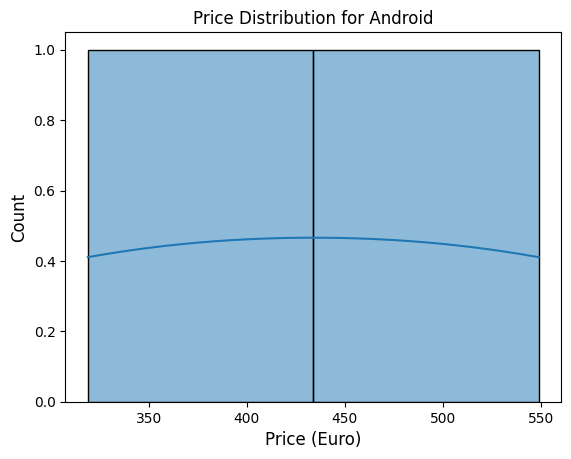

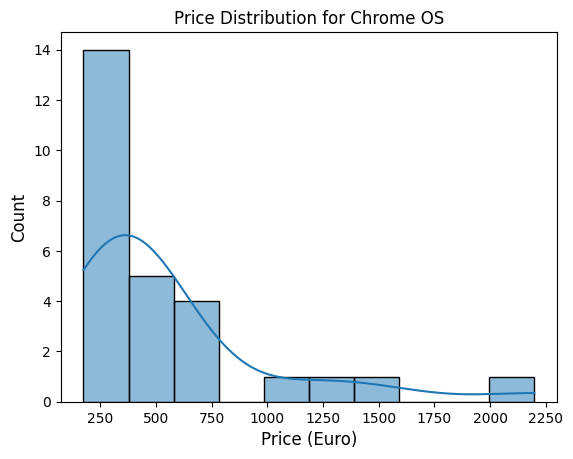

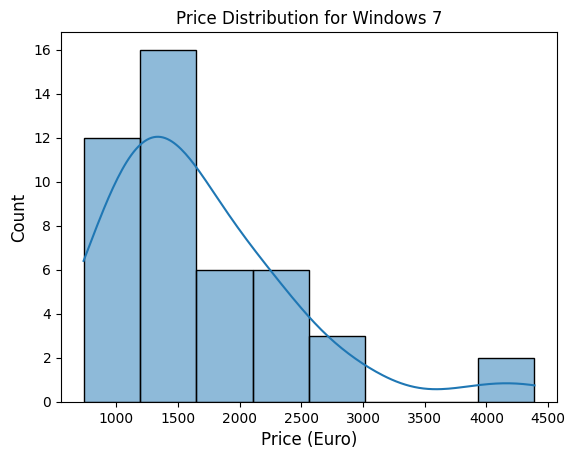

In [ ]:
unique_os = df['OpSys'].unique()
for os in unique_os: # go over all the opSys and plot the distribution
    os_data = df[df['OpSys'] == os]
    plt.figure()
    sns.histplot(os_data['Price (Euro)'], kde=True)
    plt.title(f'Price Distribution for {os}')
    plt.xlabel('Price (Euro)', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.show()


What is the relationship between RAM and computer price?

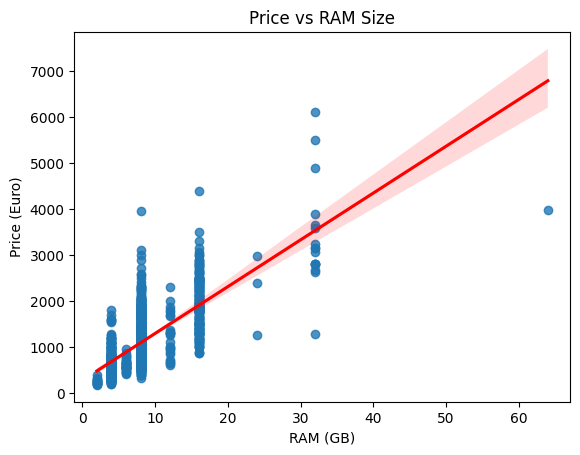

Correlation between RAM and Price: 0.7402865271622695


In [10]:
sns.regplot(x='RAM (GB)', y='Price (Euro)', data=df, line_kws={'color': 'red'})
plt.title('Price vs RAM Size')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')
plt.show()
correlation = df['RAM (GB)'].corr(df['Price (Euro)'])
print(f"Correlation between RAM and Price: {correlation}")


From this graph we can see that as RAM increases price does too with a correlation value of 0.74

Create a new column for the dataframe called "Storage type" that extracts the
storage type from the column "Memory".

In [7]:
import pandas as pd
import re

memory = df["Memory"].unique()
print("Memory Column", memory)

storage_types = ["SSD", "HDD", "Flash Storage", "Hybrid"]
pattern = r"\b(?:%s)\b" % "|".join(storage_types)  # pattern to match any of the storage types in the list

def extract_storage_type(memory):
    "a function to extract storage type from memory column using all patterns"
    all_types = re.findall(pattern, memory)  # use findall to get all matches
    return "+".join(all_types)

df["Storage Type"] = df["Memory"].apply(extract_storage_type)  # create this storage column
unique_storage = df["Storage Type"].unique()  # validation
print("Unique storage types:", unique_storage)


Memory Column ['128GB SSD' '128GB Flash Storage' '256GB SSD' '512GB SSD' '500GB HDD'
 '256GB Flash Storage' '1TB HDD' '32GB Flash Storage'
 '128GB SSD +  1TB HDD' '256GB SSD +  256GB SSD' '64GB Flash Storage'
 '256GB SSD +  1TB HDD' '256GB SSD +  2TB HDD' '32GB SSD' '2TB HDD'
 '64GB SSD' '1.0TB Hybrid' '512GB SSD +  1TB HDD' '1TB SSD'
 '256GB SSD +  500GB HDD' '128GB SSD +  2TB HDD' '512GB SSD +  512GB SSD'
 '16GB SSD' '16GB Flash Storage' '512GB SSD +  256GB SSD'
 '512GB SSD +  2TB HDD' '64GB Flash Storage +  1TB HDD' '180GB SSD'
 '1TB HDD +  1TB HDD' '32GB HDD' '1TB SSD +  1TB HDD'
 '512GB Flash Storage' '128GB HDD' '240GB SSD' '8GB SSD' '508GB Hybrid'
 '1.0TB HDD' '512GB SSD +  1.0TB Hybrid' '256GB SSD +  1.0TB Hybrid']
Unique storage types: ['SSD' 'Flash Storage' 'HDD' 'SSD+HDD' 'SSD+SSD' 'Hybrid'
 'Flash Storage+HDD' 'HDD+HDD' 'SSD+Hybrid']


Part 3


Additional questions for this dataset:


**Analysis**: Which company makes the most light weight laptops (e.g student looking for a lapotop)   
**Visualization:** Bar plot

**Analysis**: Tradeoff between CPU/GPU and lighweight
**Visualization:** : lineplot or scatter plot with regression line

**Analysis**: What Spec has the largest impact on price of laptop
**Visualization:** correlation matrix

**Analysis**:
Look at the relationship between GPU company and GPU performance
**Visualization:**  Bar plot

**Analysis**:
Group companies by distribution of its features (ex: Razor's distribution of processors have higher values)
**Visulization:**: pairwise Scatter plot



Implementation of Question 2:


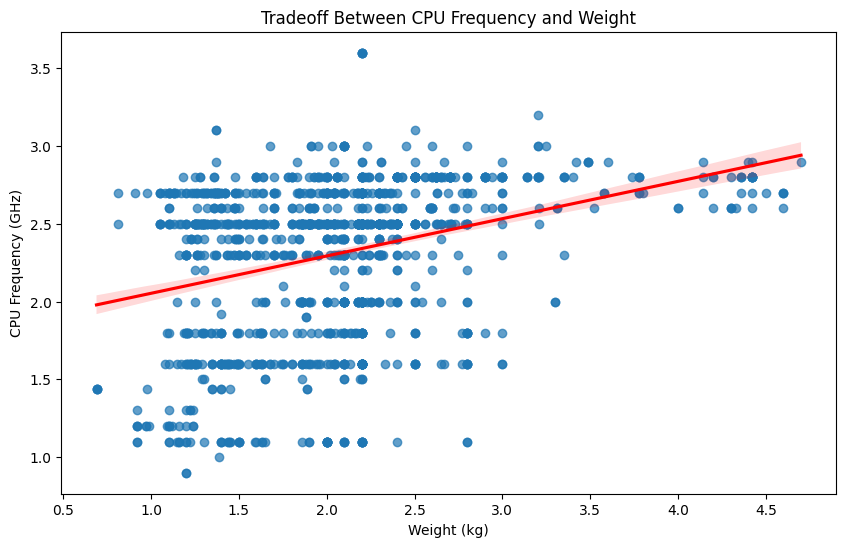

Pearson correlation coefficient: 0.31864934556335217


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(x='Weight (kg)', y='CPU_Frequency (GHz)', data=df,
            scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('Tradeoff Between CPU Frequency and Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('CPU Frequency (GHz)')
plt.show()
correlation = df['Weight (kg)'].corr(df['CPU_Frequency (GHz)']) # get the correlation value
print(f"Pearson correlation coefficient: {correlation}")

 Although intuitively I'd expect to see an increase in weight for higher CPU since gaming laptops tend to be larger to support the cooling system. The relationship is weak with a Pearson correlation coefficient: 0.31864934556335217.

Implementation of Question 3:

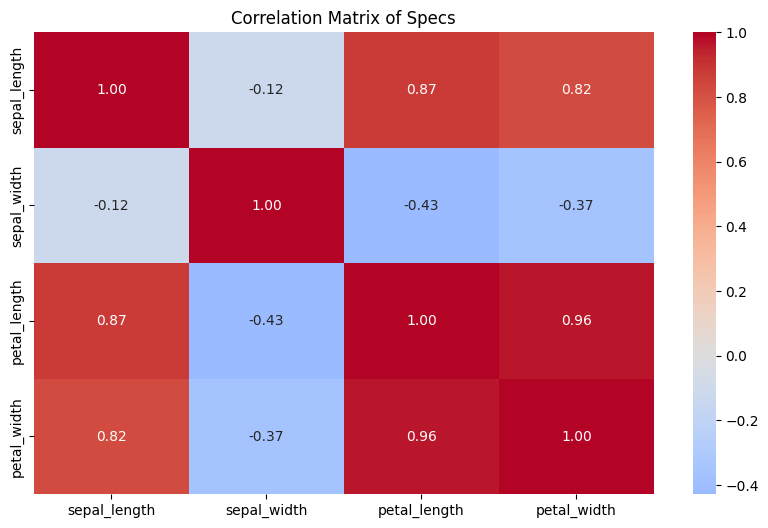

In [23]:

correlation_matrix = df.select_dtypes(include=['number']).corr() # cal only numerical columns
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title("Correlation Matrix of Specs")
plt.show()

The factor that is most correlated with price is RAM witha value of  0.740287, the next factor would be CPU with a value of 0.428847, but that would already be considered a moderate positive correlation.